### 재무제표별 분류해서 합치고 저장

In [45]:
import pandas as pd

order_list = ['01','02','03','04','05','06','07','08','09'] + list(range(10, 38))

for order in order_list:
    print(order)
    df = pd.read_excel(f"../data/batches_2015_2023/dart_statements_2015_2023_batch_{order}.xlsx")

    # 컬럼명 한글로 변경
    df = df.rename(columns={
        'corp_code': '회사코드',
        'corp_name': '회사명',
        'stock_code': '종목코드',
        'bsns_year': '사업연도',
        'rcept_no': '접수번호',
        'reprt_code': '보고서코드',
        'fs_div': '재무구분',
        'fs_nm': '재무구분명',
        'sj_div': '재무제표구분',
        'sj_nm': '재무제표명',
        'account_nm': '계정명',
        'thstrm_nm': '당기명',
        'thstrm_dt': '당기일자',
        'thstrm_amount': '당기금액',
        'frmtrm_nm': '전기명',
        'frmtrm_dt': '전기일자',
        'frmtrm_amount': '전기금액',
        'bfefrmtrm_nm': '전전기명',
        'bfefrmtrm_dt': '전전기일자',
        'bfefrmtrm_amount': '전전기금액',
        'ord': '순서',
        'currency': '통화'
    })

    # 그냥 / 연결 나누기
    print('재무구분명 :', df['재무구분명'].unique())

    재무제표 = df.loc[df['재무구분명'] == '재무제표']
    연결재무제표 = df.loc[df['재무구분명'] == '연결재무제표']

    # 재무상태표 / 손익계산서 나누기
    print('재무구분명 :', df['재무제표명'].unique())

    재무제표_재무상태표 = 재무제표.loc[재무제표['재무제표명'] == '재무상태표']
    재무제표_손익계산서 = 재무제표.loc[재무제표['재무제표명'] == '손익계산서']
    연결재무제표_재무상태표 = 연결재무제표.loc[연결재무제표['재무제표명'] == '재무상태표']
    연결재무제표_손익계산서 = 연결재무제표.loc[연결재무제표['재무제표명'] == '손익계산서']

    # To CSV
    재무제표_재무상태표.to_csv(f"../data/test/재무제표_재무상태표_{order}.csv", encoding="utf-8-sig")
    재무제표_손익계산서.to_csv(f"../data/test/재무제표_손익계산서_{order}.csv", encoding="utf-8-sig")
    연결재무제표_재무상태표.to_csv(f"../data/test/연결재무제표_재무상태표_{order}.csv", encoding="utf-8-sig")
    연결재무제표_손익계산서.to_csv(f"../data/test/연결재무제표_손익계산서_{order}.csv", encoding="utf-8-sig")

01
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
02
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
03
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
04
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
05
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
06
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
07
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
08
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
09
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
10
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
11
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
12
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
13
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
14
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
15
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
16
재무구분명 : ['재무제표' '연결재무제표']
재무구분명 : ['재무상태표' '손익계산서']
17
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
18
재무구분명 : ['연결재무제표' '재무제표']
재무구분명 : ['재무상태표' '손익계산서']
19
재무구분명 :

### To Pivot
- file_name 바꿔줘야함

In [46]:
import glob

file_name = "재무제표_손익계산서"
file_list = glob.glob(f"../data/test/{file_name}_*.csv")

dfs = []
for file in file_list:
    df_tmp = pd.read_csv(file)
    dfs.append(df_tmp)

all = pd.concat(dfs, ignore_index=True)

# '당기금액', '전기금액' 숫자형 변환
all['당기금액'] = pd.to_numeric(all['당기금액'].str.replace(',', ''), errors='coerce')
all['전기금액'] = pd.to_numeric(all['전기금액'].str.replace(',', ''), errors='coerce')

print(file_name, ' 계정명 :', all['계정명'].unique())

# 당기 피벗
pivot_thstrm = all.pivot_table(
    index=['회사코드', '회사명', '종목코드', '사업연도'],
    columns='계정명',
    values='당기금액',
    aggfunc='first'
).reset_index()
pivot_thstrm.columns = [f"{col}_당기" if col not in ['회사코드', '회사명', '종목코드', '사업연도'] else col for col in pivot_thstrm.columns]

# 전기 피벗
pivot_frmtrm = all.pivot_table(
    index=['회사코드', '회사명', '종목코드', '사업연도'],
    columns='계정명',
    values='전기금액',
    aggfunc='first'
).reset_index()
pivot_frmtrm.columns = [f"{col}_전기" if col not in ['회사코드', '회사명', '종목코드', '사업연도'] else col for col in pivot_frmtrm.columns]

# 병합
pivot_df = pd.merge(pivot_thstrm, pivot_frmtrm, on=['회사코드', '회사명', '종목코드', '사업연도'], how='outer')

# 내보내기
pivot_df.to_csv(f"../data/raw/{file_name}_pivot.csv", encoding="utf-8-sig", index=False)

재무제표_손익계산서  계정명 : ['매출액' '영업이익' '법인세차감전 순이익' '당기순이익' '당기순이익(손실)' '총포괄손익' '영업비용' '이자수익'
 '이자비용' '영업이익(손실)' '순이자손익' '순수수료손익' '파생상품관련손익' '금융상품관련순손익']


### 재무제표_재무상태표 / 재무재표_손익계산서 Non-Null 분포

In [2]:
import pandas as pd

재무상태표 = pd.read_csv("../data/raw/재무상태표_pivot.csv", dtype={"bsns_year": str, "corp_code": str})
재무상태표.describe()

,부채총계_당기,비유동자산_당기,유동부채_당기,유동자산_당기,이익잉여금_당기,자본금_당기,자본총계_당기,자산총계_당기,현금및현금성자산_당기,부채총계_전기,비유동자산_전기,유동부채_전기,유동자산_전기,이익잉여금_전기,자본금_전기,자본총계_전기,자산총계_전기,현금및현금성자산_전기
count,1.856000e+04,1.823800e+04,1.843800e+04,1.830900e+04,1.802500e+04,1.796000e+04,1.837800e+04,1.855100e+04,1.856100e+04,1.843400e+04,1.813000e+04,1.831900e+04,1.819000e+04,1.790600e+04,1.783700e+04,1.826400e+04,1.842700e+04,1.843600e+04
mean,2.867887e+12,5.440972e+12,1.954396e+12,2.843137e+12,-1.766932e+12,1.210430e+12,5.564610e+12,8.390563e+12,4.122059e+11,2.747641e+12,5.479662e+12,2.240298e+12,2.971858e+12,-4.448850e+12,4.192971e+12,5.848117e+12,8.552853e+12,6.400387e+11
std,2.369430e+14,5.387445e+14,1.702640e+14,2.298725e+14,4.158418e+14,1.436715e+14,5.112671e+14,7.439959e+14,3.482036e+13,2.190684e+14,4.765007e+14,2.021524e+14,2.456819e+14,6.793143e+14,4.357180e+14,5.037308e+14,7.108296e+14,6.703638e+13
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.395927e+16,0.000000e+00,-9.495568e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.081441e+16,0.000000e+00,-6.123196e+11,0.000000e+00,0.000000e+00
25%,1.835334e+10,3.287951e+10,1.276366e+10,2.957913e+10,2.748255e+09,5.455000e+09,4.403114e+10,7.203699e+10,3.559435e+09,1.759677e+10,3.010161e+10,1.227784e+10,2.785489e+10,3.881581e+09,5.071428e+09,4.076245e+10,6.729871e+10,3.218599e+09
50%,4.633005e+10,7.642348e+10,3.530818e+10,6.101182e+10,3.898004e+10,1.028364e+10,9.028355e+10,1.472105e+11,9.701238e+09,4.455303e+10,7.089615e+10,3.376709e+10,5.811005e+10,3.647228e+10,9.834622e+09,8.367129e+10,1.380644e+11,8.845362e+09
75%,1.341389e+11,2.071058e+11,9.908933e+10,1.390630e+11,1.274785e+11,2.380496e+10,2.151556e+11,3.689947e+11,2.633504e+10,1.275921e+11,1.925103e+11,9.428541e+10,1.313845e+11,1.178348e+11,2.261521e+10,2.015223e+11,3.454480e+11,2.390465e+10
max,3.108538e+16,7.112329e+16,2.153767e+16,2.390521e+16,1.431236e+16,1.920242e+16,6.394312e+16,9.502850e+16,4.510632e+15,2.782811e+16,5.593482e+16,2.541636e+16,2.352105e+16,3.917086e+15,5.518129e+16,5.162776e+16,7.945587e+16,9.002407e+15


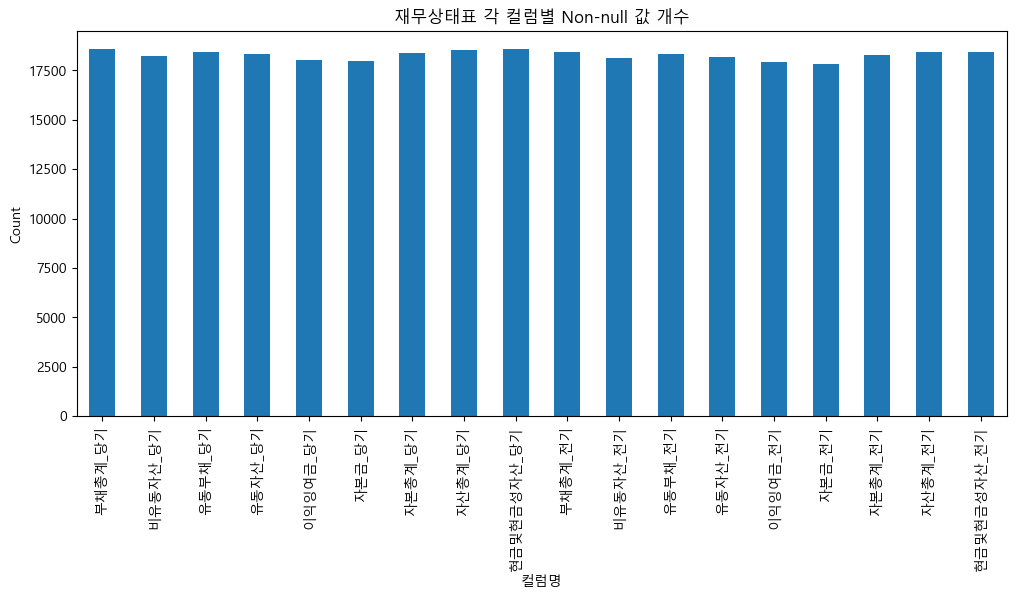

In [4]:
import matplotlib.pyplot as plt

# 5~23번 컬럼명 추출
cols = 재무상태표.columns[2:]

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 각 컬럼별 non-null count 계산
count_series = 재무상태표[cols].count()

# plot
count_series.plot(kind='bar', figsize=(12, 5))
plt.title(f'재무상태표 각 컬럼별 Non-null 값 개수')
plt.ylabel('Count')
plt.xlabel('컬럼명')
plt.show()

### 손익계산서 회사명 매핑

In [1]:
import pandas as pd

df_xml = pd.read_xml("../data/raw/CORPCODE.xml", dtype={"corp_code": str})
df_xml['modify_date'] = pd.to_datetime(df_xml['modify_date'])
df_xml.info()

listed_companies_df = df_xml.loc[df_xml['stock_code'].replace(' ', pd.NA).notna()].copy()
listed_companies_df.info()

listed_companies_df.reset_index(inplace=True, drop=True)
listed_companies_df

XMLSyntaxError: StartTag: invalid element name, line 403932, column 2 (<string>, line 403932)

In [ ]:
import pandas as pd
iis = pd.read_csv("../data/raw/재무제표_손익계산서_pivot.csv")


### 재무상태표 회사명 매핑
- 재무상태표 + corp_code stock code 매핑

In [34]:
import pandas as pd

df_xml = pd.read_xml("../data/raw/CORPCODE.xml", dtype={"corp_code": str})
df_xml['modify_date'] = pd.to_datetime(df_xml['modify_date'])
df_xml.info()

listed_companies_df = df_xml.loc[df_xml['stock_code'].replace(' ', pd.NA).notna()].copy()
listed_companies_df.info()

listed_companies_df.reset_index(inplace=True, drop=True)
listed_companies_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112646 entries, 0 to 112645
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   corp_code      112646 non-null  object        
 1   corp_name      112646 non-null  object        
 2   corp_eng_name  112113 non-null  object        
 3   stock_code     112646 non-null  object        
 4   modify_date    112646 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 3870 entries, 1946 to 112629
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   corp_code      3870 non-null   object        
 1   corp_name      3870 non-null   object        
 2   corp_eng_name  3870 non-null   object        
 3   stock_code     3870 non-null   object        
 4   modify_date    3870 non-null   datetime64[ns]
dtyp

,corp_code,corp_name,corp_eng_name,stock_code,modify_date
0,00260985,한빛네트,"HanbitNet, Inc.",036720,1970-01-01 00:00:00.020170630
1,00264529,엔플렉스,"Nplex,Inc.",040130,1970-01-01 00:00:00.020170630
2,00358545,동서정보기술,"Dong Seo Information Technology Co., Ltd.",055000,1970-01-01 00:00:00.020170630
3,00231567,애드모바일,,032600,1970-01-01 00:00:00.020170630
4,00359614,리더컴,"LEADER COMM.Co.,Ltd",056140,1970-01-01 00:00:00.020170630
...,...,...,...,...,...
3865,01049167,더바이오메드,"THE BioMed Co., Ltd.",214610,1970-01-01 00:00:00.020250509
3866,01267550,나라소프트,"NARASOFT Co.,Ltd.",288490,1970-01-01 00:00:00.020250509
3867,01113499,아이티센피엔에스,"ITCENPNS CO.,LTD.",232830,1970-01-01 00:00:00.020250509
3868,00488244,원일티엔아이,"WONILTNI CO., LTD.",136150,1970-01-01 00:00:00.020250509


In [35]:
cf = pd.read_csv("../data/raw/현금흐름표_간접법_별도_12월.csv")
cf = cf[['종목코드', '결산기준일', '기말의현금', '기초의현금', '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름']]

In [36]:
# stock_code 컬럼명 통일 및 전처리
cf['종목코드'] = cf['종목코드'].str.replace('[\[\]]', '', regex=True)
listed_companies_df['stock_code'] = listed_companies_df['stock_code'].astype(str)

# 매핑: cf에 corp_code 추가
cf = cf.merge(
    listed_companies_df[['stock_code', 'corp_code']],
    how='left',
    left_on='종목코드',
    right_on='stock_code',
    suffixes=('', '_mapped')
)

cf['bsns_year'] = cf['결산기준일'].str[:4]
cf

,종목코드,결산기준일,기말의현금,기초의현금,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,stock_code,corp_code,bsns_year
0,000020,2015-12-31,4.488938e+10,3.262318e+10,1.983311e+10,-6.588907e+09,-9.797323e+08,000020,00119195,2015
1,000020,2016-12-31,3.573038e+10,4.488938e+10,2.548219e+10,-4.213178e+09,-3.042896e+10,000020,00119195,2016
2,000020,2017-12-31,3.158817e+10,3.573038e+10,-1.651997e+10,-3.919633e+09,1.631003e+10,000020,00119195,2017
3,000020,2018-12-31,3.972989e+10,3.158817e+10,-2.347075e+08,-4.141160e+09,1.251739e+10,000020,00119195,2018
4,000020,2019-12-31,3.772988e+10,3.972989e+10,1.412029e+10,-4.937574e+09,-1.117845e+10,000020,00119195,2019
...,...,...,...,...,...,...,...,...,...,...
21031,null,2024-12-31,1.708573e+11,4.729180e+11,3.983773e+11,-6.573317e+11,-4.347900e+10,NaN,NaN,2024
21032,null,2023-12-31,2.164653e+10,3.177833e+10,2.272632e+10,-5.065653e+10,1.779842e+10,NaN,NaN,2023
21033,null,2024-12-31,4.763413e+10,2.164653e+10,3.017769e+10,-1.023742e+10,6.034555e+09,NaN,NaN,2024
21034,null,2023-12-31,8.414958e+10,5.490394e+10,4.012812e+10,-1.307140e+10,2.188926e+09,NaN,NaN,2023


In [37]:
cf = cf.loc[~cf['stock_code'].isna()]
cf = cf[['bsns_year','corp_code', '기말의현금', '기초의현금', '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름']]
cf.reset_index(inplace=True, drop=True)
cf

,bsns_year,corp_code,기말의현금,기초의현금,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름
0,2015,00119195,4.488938e+10,3.262318e+10,1.983311e+10,-6.588907e+09,-9.797323e+08
1,2016,00119195,3.573038e+10,4.488938e+10,2.548219e+10,-4.213178e+09,-3.042896e+10
2,2017,00119195,3.158817e+10,3.573038e+10,-1.651997e+10,-3.919633e+09,1.631003e+10
3,2018,00119195,3.972989e+10,3.158817e+10,-2.347075e+08,-4.141160e+09,1.251739e+10
4,2019,00119195,3.772988e+10,3.972989e+10,1.412029e+10,-4.937574e+09,-1.117845e+10
...,...,...,...,...,...,...,...
20555,2020,01511558,6.484508e+07,8.715967e+07,-2.715646e+07,3.097100e+04,4.810895e+06
20556,2021,01511558,1.279518e+08,6.484508e+07,-2.897376e+07,9.727064e+07,-4.717198e+06
20557,2022,01511558,8.912677e+07,1.279518e+08,-3.485141e+07,1.054600e+05,-1.926115e+06
20558,2023,01511558,4.997775e+07,8.912677e+07,-4.043696e+07,-2.695020e+05,1.617621e+06


In [38]:
cf.to_csv("../data/raw/현금흐름표_간접법_별도_12월_v2.csv", encoding="utf-8-sig")

### 재무상태표, 손익계산서 피처 만들기
- 1차
  - 부채비율 유동비율 자기자본비율 고정자산비율 고정비율 순운전자본비율 ln자산총계 총자산이익잉여금비율 ln매출액 매출액순이익률

In [39]:
import pandas as pd

# balance_sheet = pd.read_csv("../data/raw/재무제표_재무상태표.csv")
bs = 재무상태표.copy()
print(bs.columns)

# iis = pd.read_csv("../data/raw/재무제표_손익계산서.csv")
# print(iis.columns)

cf = pd.read_csv("../data/raw/현금흐름표_간접법_별도_12월_v2.csv")
print(cf.columns)

Index(['corp_code', 'bsns_year', '부채총계_당기', '비유동자산_당기', '유동부채_당기', '유동자산_당기',
       '이익잉여금_당기', '자본금_당기', '자본총계_당기', '자산총계_당기', '현금및현금성자산_당기', '부채총계_전기',
       '비유동자산_전기', '유동부채_전기', '유동자산_전기', '이익잉여금_전기', '자본금_전기', '자본총계_전기',
       '자산총계_전기', '현금및현금성자산_전기'],
      dtype='object')
Index(['Unnamed: 0', 'bsns_year', 'corp_code', '기말의현금', '기초의현금', '영업활동현금흐름',
       '재무활동현금흐름', '투자활동현금흐름'],
      dtype='object')


In [42]:
# bs, cf를 bsns_year, corp_code 기준으로 병합 (타입 일치시켜야 함)
bs['bsns_year'] = bs['bsns_year'].astype(str)
cf['bsns_year'] = cf['bsns_year'].astype(str)
bs['corp_code'] = bs['corp_code'].astype(str)
cf['corp_code'] = cf['corp_code'].astype(str)
cf.drop(['Unnamed: 0'], axis=1, inplace=True)
merged_df = bs.merge(cf, on=['bsns_year', 'corp_code'], how='left')
merged_df.head()

,corp_code,bsns_year,부채총계_당기,비유동자산_당기,유동부채_당기,유동자산_당기,이익잉여금_당기,자본금_당기,자본총계_당기,자산총계_당기,...,이익잉여금_전기,자본금_전기,자본총계_전기,자산총계_전기,현금및현금성자산_전기,기말의현금,기초의현금,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름
0,100258,2015,3.643261e+10,4.670700e+10,3.148314e+10,1.460986e+10,-1.628070e+10,1.240150e+10,2.488424e+10,6.131686e+10,...,1.428609e+08,6.000000e+09,2.223409e+10,7.365082e+10,2.535131e+08,2.504172e+09,2.535131e+08,6.093874e+07,4.307958e+09,-2.118238e+09
1,100258,2016,5.513479e+10,8.622053e+10,7.091773e+09,1.713464e+10,-3.318675e+10,2.031045e+10,4.822038e+10,1.033552e+11,...,-1.348169e+10,1.240150e+10,2.488424e+10,6.131686e+10,2.504172e+09,-6.010688e+08,2.504172e+09,-9.168685e+09,6.247090e+10,-5.520532e+10
2,100258,2017,2.830794e+10,2.514420e+10,2.760995e+10,3.391810e+10,-1.177554e+11,4.756475e+10,3.075436e+10,5.906230e+10,...,-3.318675e+10,2.031045e+10,4.822038e+10,1.033552e+11,6.010688e+08,5.354819e+09,6.010688e+08,-1.903400e+10,4.019198e+10,-1.509449e+10
3,100258,2018,2.398612e+10,3.248428e+10,2.338065e+10,1.048737e+10,-1.560779e+11,3.781350e+09,2.793774e+10,5.192386e+10,...,-1.250310e+11,4.756475e+10,2.651582e+10,5.906230e+10,5.354819e+09,2.448486e+08,5.354819e+09,-7.465019e+09,1.865509e+10,-1.630004e+10
4,100258,2019,1.371816e+10,1.839898e+10,1.361429e+10,9.936257e+09,-1.688923e+11,3.781350e+09,1.512338e+10,2.884155e+10,...,-1.560779e+11,3.781350e+09,2.793774e+10,5.192386e+10,2.448486e+08,4.335492e+07,2.448486e+08,-2.043666e+09,-6.150000e+09,3.146172e+09


In [43]:
merged_df.to_csv("../data/raw/merged_bs_cf.csv", encoding="utf-8-sig")

In [ ]:
# merged_df[''] = merged_df[''] / merged_df['']
# 건전성

merged_df['부채비율'] = (merged_df['부채총계_당기'] / merged_df['자본총계_당기'])
merged_df['유동비율'] = (merged_df['유동자산_당기'] / merged_df['유동부채_당기'])
merged_df['자기자본비율'] = (merged_df['자본총계_당기'] / merged_df['자산총계_당기'])
merged_df['고정자산비율'] = (merged_df['비유동자산_당기'] / merged_df['자산총계_당기'])
merged_df['고정비율'] = (merged_df['비유동자산_당기'] / merged_df['자본총계_당기'])
merged_df['순운전자본비율'] = ((merged_df['유동자산_당기'] - merged_df['유동부채_당기']) / merged_df['자산총계'])

merged_df['현금비율'] = merged_df['현금및현금성자산_전기'] / merged_df['유동부채_당기']
merged_df['현금흐름부채비율'] = merged_df['영업활동현금흐름'] / merged_df['부채총계_당기']

merged_df['완전자본잠식여부'] = (merged_df['자본금_당기'] < 0).astype(int)
merged_df['자본잠식여부'] = (merged_df['자본총계_당기'] < 0).astype(int)

In [ ]:
# 성장성

merged_df['총자산증가율'] = (merged_df['자산총계_당기'] - merged_df['자산총계_전기']) / merged_df['자산총계_전기']
merged_df['유동자산증가율'] = (merged_df['유동자산_당기'] - merged_df['유동자산_전기']) / merged_df['유동자산_전기']

In [ ]:
# 유동성

merged_df['현금자산비율'] = merged_df['현금및현금성자산_당기'] / merged_df['자산총계_당기']
merged_df['자산대비영업현금흐름'] = merged_df['영업활동현금흐름'] / merged_df['자산총계_당기']

In [ ]:
import numpy as np

# 규모
merged_df['ln자산총계'] = np.log(merged_df['자산총계_당기'])

c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 손익계산서 하고

In [ ]:
# 수익성
merged_df['총자산이익잉여금비율'] = (merged_df['이익잉여금'] / merged_df['자산총계'])

In [18]:
# 수익성
iis['매출액순이익률'] = iis['당기순이익'] / iis['매출액']

In [ ]:
# 규모
iis['ln매출액'] = np.log(iis['매출액'])

c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\tktk5\Downloads\RiskRadar\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
# 필요한 컬럼만 추출
bs_cols = ['사업연도', '회사명', '부채비율', '유동비율', '자기자본비율', '고정자산비율', '고정비율', '순운전자본비율', 'ln자산총계', '총자산이익잉여금비율']
iis_cols = ['사업연도', '회사명', 'ln매출액', '매출액순이익률']

bs_sel = bs[bs_cols]
iis_sel = iis[iis_cols]

# 머지
merged = pd.merge(bs_sel, iis_sel, on=['사업연도', '회사명'], how='outer')
merged.head()

,사업연도,회사명,부채비율,유동비율,자기자본비율,고정자산비율,고정비율,순운전자본비율,ln자산총계,총자산이익잉여금비율,ln매출액,매출액순이익률
0,2015,3S,0.763604,0.694608,0.567021,0.775610,1.367869,-0.098656,24.919477,-0.285427,23.772739,-0.262422
1,2015,AJ네트웍스,1.336227,0.412123,0.428041,0.850102,1.986031,-0.213824,27.141447,NaN,26.004031,0.097113
2,2015,AK홀딩스,0.115549,0.074425,0.896420,0.992424,1.107097,-0.094216,26.981501,0.350460,23.736496,1.072212
3,2015,APS,1.445113,1.040981,0.408979,0.467747,1.143695,0.020954,26.289558,0.189401,26.346126,0.033888
4,2015,AP위성,0.120534,8.092935,0.892432,0.199405,0.223440,0.701670,24.463482,0.402504,24.319690,0.241527


In [23]:
merged.isna().sum(), merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18354 entries, 0 to 18353
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사업연도        18354 non-null  object 
 1   회사명         18354 non-null  object 
 2   부채비율        18296 non-null  float64
 3   유동비율        18279 non-null  float64
 4   자기자본비율      18278 non-null  float64
 5   고정자산비율      18228 non-null  float64
 6   고정비율        18196 non-null  float64
 7   순운전자본비율     18257 non-null  float64
 8   ln자산총계      18331 non-null  float64
 9   총자산이익잉여금비율  18023 non-null  float64
 10  ln매출액       17778 non-null  float64
 11  매출액순이익률     17734 non-null  float64
dtypes: float64(10), object(2)
memory usage: 1.7+ MB


(사업연도            0
 회사명             0
 부채비율           58
 유동비율           75
 자기자본비율         76
 고정자산비율        126
 고정비율          158
 순운전자본비율        97
 ln자산총계         23
 총자산이익잉여금비율    331
 ln매출액         576
 매출액순이익률       620
 dtype: int64,
 None)

In [24]:
merged.to_csv("../data/processed/features_v1.csv", encoding="utf-8-sig")